In [1]:
import folium
import requests

In [2]:
def geocoder(location):
    url = 'https://maps.googleapis.com/maps/api/geocode/json'
    params = {'sensor': 'false', 'address': location}
    r = requests.get(url, params=params)
    results = r.json()['results']
    location = results[0]['geometry']['location']
    return (location['lat'], location['lng'])




In [3]:
yandex_point  = geocoder('Москва, Льва Толстого 16')

In [4]:
import folium




In [5]:
our_line = [(55.843780517578125, 37.40298843383789),
 (55.84374237060547, 37.4034309387207),
 (55.84373092651367, 37.40360641479492),
 (55.84276580810547, 37.403594970703125),
 (55.84250259399414, 37.40380096435547),
 (55.84197235107422, 37.40454864501953),
 (55.840362548828125, 37.40694046020508),
 (55.84004211425781, 37.40742874145508),
 (55.83966827392578, 37.40797424316406),
 (55.83917236328125, 37.4087028503418),
 (55.8390007019043, 37.408851623535156),
 (55.83866500854492, 37.40829086303711),
 (55.838619232177734, 37.408180236816406),
 (55.83856201171875, 37.40803146362305),
 (55.83848571777344, 37.4078369140625),
 (55.83799743652344, 37.406890869140625),
 (55.83768081665039, 37.40652084350586),
 (55.83744812011719, 37.40628433227539),
 (55.83726501464844, 37.406131744384766),
 (55.836944580078125, 37.40591049194336),
 (55.83681106567383, 37.40584945678711),
 (55.83675765991211, 37.405818939208984),
 (55.836097717285156, 37.4055061340332),
 (55.83596420288086, 37.40544509887695),
 (55.83555221557617, 37.40529251098633),
 (55.835105895996094, 37.40516662597656),
 (55.83498001098633, 37.405147552490234),
 (55.83424377441406, 37.40515899658203),
 (55.833580017089844, 37.40523910522461),
 (55.83348846435547, 37.40525436401367),
 (55.833160400390625, 37.405303955078125),
 (55.832794189453125, 37.40534210205078),
 (55.83258056640625, 37.405391693115234),
 (55.83234786987305, 37.405460357666016),
 (55.83211898803711, 37.40557098388672),
 (55.83170700073242, 37.40542221069336),
 (55.83097839355469, 37.40501022338867),
 (55.83084487915039, 37.4049186706543),
 (55.83103561401367, 37.40401840209961),
 (55.83127975463867, 37.402870178222656),
 (55.8312873840332, 37.402828216552734),
 (55.83133316040039, 37.40260696411133),
 (55.8314208984375, 37.40217971801758),
 (55.83159255981445, 37.40134811401367),
 (55.8317985534668, 37.400333404541016),
 (55.832000732421875, 37.39931106567383),
 (55.832122802734375, 37.39863586425781),
 (55.83256149291992, 37.39588165283203),
 (55.8326530456543, 37.39531707763672),
 (55.83281707763672, 37.39418029785156),
 (55.832908630371094, 37.39248275756836),
 (55.832950592041016, 37.3922004699707),
 (55.8330078125, 37.39185333251953),
 (55.83306884765625, 37.39154815673828),
 (55.83322525024414, 37.390892028808594),
 (55.833290100097656, 37.39065170288086),
 (55.833335876464844, 37.39048767089844),
 (55.833744049072266, 37.38931655883789),
 (55.83378601074219, 37.389217376708984),
 (55.833831787109375, 37.38909912109375),
 (55.833866119384766, 37.389015197753906),
 (55.833946228027344, 37.388832092285156),
 (55.834163665771484, 37.38868713378906),
 (55.833961486816406, 37.38961410522461),
 (55.83385467529297, 37.389190673828125),
 (55.833831787109375, 37.38909912109375),
 (55.83379364013672, 37.388946533203125),
 (55.83375549316406, 37.388668060302734),
 (55.83376693725586, 37.388370513916016),
 (55.83393478393555, 37.3879508972168),
 (55.83517837524414, 37.385894775390625),
 (55.83561706542969, 37.384979248046875),
 (55.8360595703125, 37.38407897949219),
 (55.836708068847656, 37.382781982421875),
 (55.836978912353516, 37.38221740722656),
 (55.836997985839844, 37.38218307495117),
 (55.836910247802734, 37.38206481933594),
 (55.83689880371094, 37.3820915222168)]

In [6]:
from shapely.geometry import LineString,mapping

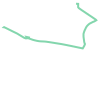

In [8]:
our_line_as_geometry =LineString([x[::-1] for x in our_line])
our_line_as_geometry

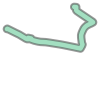

In [9]:
our_line_as_geometry.buffer(0.001)

In [10]:
# import json
# line_json = json.dumps(mapping(our_line_as_geometry)) 

# line_json

In [11]:
map_path = 'first_map.html'

In [21]:
# Инициализируем карту
m = folium.Map(location=our_line[-1], zoom_start=13)
# Выбираем подложку (нужно почитать про folium tiiles)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)

# добавляем маркер на месте яндекса
folium.Marker(location=yandex_point).add_to(m)

#добавляем маршрут в качестве еще одного объекта
fg = folium.FeatureGroup('sample')
folium.PolyLine(locations=our_line, color='cyan', weight=3,popup='Our_line', opacity=0.8).add_to(fg)


#добавим начало и конец маршрута
folium.CircleMarker(location=our_line[0], radius=5,
                    popup='Start', color='green',
                    fill_color='green').add_to(fg)

folium.CircleMarker(location=our_line[-1], radius=5,
                    popup='Fin', color='red',
                    fill_color='red').add_to(fg)
fg.add_to(m)


# Добавляем возможность выбирать подложку и убирать/добавлять объекты
folium.LayerControl().add_to(m)
# Сохраняем карту
m.save(map_path)
m.save('/home/feofanov/public_html/pool/ride.html')



In [22]:

from IPython.display import display, IFrame

display(IFrame(map_path, width=700, height=350) )


